In [2]:
# Complex Eigenvalues
# Author: Zhang Su (Teaching Assistant)
# Using python3, numpy, matplotlib.
# 21 June 2020

# Learning Outcome

By the end of this material, you should be able to:

+ Witness the rotation and scaling effect produced by complex eigenvalues and eigenvectors.
+ Design a matrix producing 
    + couterclockwise 2-Drotation with a specific degree, and 
    + scaling with a specific factor.


Note: 
1. If you occasionally double clicked a textual cell, the display would change to markdown source code. To reverse, simply click anywhere of that markdown cell,  and then click **Run** in the top manu.
2. Sometimes the notebook may not be responding. That is caused by the failure of jupyter kernel. To repair, try clicking **Kernel** in the top manu, then clicking **Reconnect**. 
3. Section Takeaways summarizes useful tips, e.g., holes of Python to avoid, if any.
4. Section Practice reflect the learning outcomes. You are expected to solve them based on your understanding on the lecture notes alone with the coding skills learned from this demo.

## If you just opened the demo, please manually run the cell one-by-one to show the animation correctly!

# Table of contents <a name="Table_of_Content"></a>
+ [Recap of Eigen Decomposition](#RED)
    + [Scaling-only Transformation](#ST)
+ [Rotation Transformation](#R)
    + [How Does Rotation Happen?](#HDRH)
    + [Example](#Example)
+ [Design a Transformation with Specific Scaling and Rotation](#DRT)
+ [Takwaways](#Takeaways)
+ [Practice](#Practice)

In this demo we will start by recapping the eigen decomposition on $\mathbb{R}^2$, using the example we used in `Section_8.1_EVD` demo.

Recall that we have made a conclusion that **an eigenvalue `d` will scale anything in the eigenspace by a factor of `d`.** Today you will find that **it is not the whole story when `d` is a complex number**.

Let's import the libraries.

In [3]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as anime
from matplotlib import cm
from pylab import *
%matplotlib notebook

# You may ignore the warnings.

### Recap of Eigen Decomposition<a name="RED"></a>
[Return to Table of Content](#Table_of_Content)

Given $A=\begin{pmatrix}2 & 1\\
1 & 2
\end{pmatrix}$, we carry out the eigen decomposition as below.

In [4]:
A = np.array([[2, 1],
             [1, 2]], dtype=float)

D_diag, P = la.eig(A)
D = np.diag(D_diag)
print("The eigenvalues D are \n", D.round(4))
print("The eigenvectors P are \n", P.round(4))
print("The human-friendly version of eigenvectors P are \n", np.array([[1, -1],
             [1, 1]], dtype=float))

The eigenvalues D are 
 [[3. 0.]
 [0. 1.]]
The eigenvectors P are 
 [[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]
The human-friendly version of eigenvectors P are 
 [[ 1. -1.]
 [ 1.  1.]]


#### Scaling-only Transformation<a name="ST"></a>
[Return to Table of Content](#Table_of_Content)

By manually taking $P=\begin{pmatrix}1 & -1\\
1 & 1
\end{pmatrix}$ in a human-friendly manner, we can see, as we analyzed previously, that any points (in fact each point represent a vector, remember this) located on the eigenvectors $\begin{pmatrix}1\\1\end{pmatrix}$ and $\begin{pmatrix}-1\\1\end{pmatrix}$, will be scaled by the factors of $3$ and $1$, respectively. As for other points, they are also scaled but not by a consistent factor, as visualized below.

![](img/eigen_space.png)
>Figure 1. The visualization of the linear transformation $x\mapsto Ax$ on $\mathbb{R}^2$.

So we made a conclusion that **an eigenvalue `d` will scale anything in the eigenspace by a factor of `d`.**

Now let's see another case, which is *rotation*, in addition to the *scaling*.


### Rotation<a name="R"></a>
[Return to Table of Content](#Table_of_Content)

Given $A=\begin{pmatrix}0&-1\\
1&0\end{pmatrix}$, a vector $x_0$, and the what linear transformation $x\mapsto Ax$, we obtain:

$$
\begin{align}
x_1&=Ax_0\\
x_2&=Ax_1=AAx_0\\
x_3&=Ax_2=AAx_1=AAAx_0\\
\ldots\\
x_n&=Ax_{n-1}=A^{n}x_0
\end{align}
$$

If $A$ is so-called a *rotation matrix*, then at some $n=i$ we may see $x_i=x_0$. Let's animate these imagination and check!

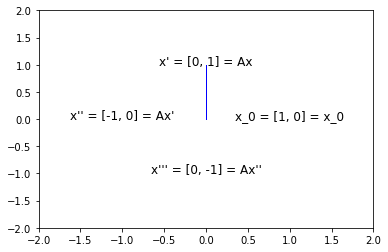

In [5]:
A, x = np.array([[0, -1],[1, 0]]), np.array([[1],[0]])
fargs = [A, x]

plt.close() # This is to close other interactive plots, or the animation will glitch!

# Initiate the plot
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))

line, = ax.plot([0, 1],[0,0], color = 'b', linewidth = 1)
text(1, 0, 'x_0 = [1, 0] = x_0', fontsize=12,horizontalalignment='center')
text(0, 1, 'x\' = [0, 1] = Ax', fontsize=12,horizontalalignment='center')
text(-1, 0, 'x\'\' = [-1, 0] = Ax\'', fontsize=12,horizontalalignment='center')
text(0, -1, 'x\'\'\' = [0, -1] = Ax\'\'', fontsize=12,horizontalalignment='center')


def update(i, *fargs):
    # Get the original A and x
    A, x = fargs
    
    # Calculate the A to the power of n
    A = la.matrix_power(A, int(i+1))
    
    # Transform x
    x = A.dot(x)
    
    # Update the line
    line.set_data([0, x[0,0]],[0,x[1,0]])
    return line

# Update the canvas
fig.canvas.draw()
# Animate the figure, the speed is controlled by 'interval'
# A larger 'interval' lead to slower speed.
ani = anime.FuncAnimation(fig, update, fargs=fargs, interval=500)

As expected, when $n=4$, we get $x_0$ back. We conclude that this $A=\begin{pmatrix}0&-1\\
1&0\end{pmatrix}$ can rotate a vector for $\pi/2$ rad on a 2-d plane. How about lots of $x$? Let's animate and check!

In the example below, the red line is drawn so that the animation will not cheat our eyes. You should see that the whole grid is rotated for $\pi/2$ rad as well.

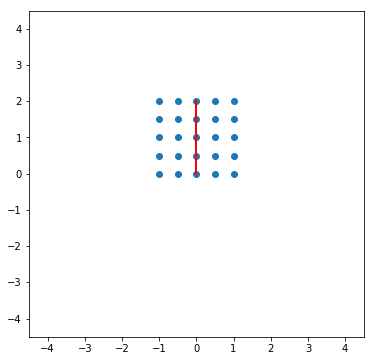

In [6]:
A, x = np.array([[0, -1],[1, 0]]), np.array([[2],[0]])
fargs = [A, x]

plt.close() # This is to close other interactive plots, or the animation will glitch!
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(xlim=(-4.5, 4.5), ylim=(-4.5, 4.5))

scat = ax.scatter([],[])
line, = ax.plot([],[], color = 'r', linewidth = 2)

def update(i, *fargs):
    # Get the original A and x
    A, x = fargs
    
    # Calculate the red vector.
    A = la.matrix_power(A, int(i+1))
    x = A.dot(x)
    
    # Calculate the grid.
    density = 0.5
    x1, x2 = np.mgrid[slice(0, 2 + density, density),
                     slice(-1, 1 + density, density)]
    all_the_v = np.c_[x1.flatten(), x2.flatten()]
    all_the_b = all_the_v.dot(A.T)
    
    
    # Update the data
    line.set_data([0, x[0,0]],[0,x[1,0]])
    scat.set_offsets(all_the_b)
    return [scat, line]


fig.canvas.draw()
ani = anime.FuncAnimation(fig, update, fargs=fargs, interval=500)

### How Does Rotation Happen?<a name="HDRH"></a>
[Return to Table of Content](#Table_of_Content)

The secret to the rotation is hidden in the real and imaginary parts of a complex eigenvector.

Let's carry out eigen decomposition on $A=\begin{pmatrix}0&-1\\
1&0\end{pmatrix}$. We should obtain two eigenvalues $\lambda_1=i$ and $\lambda_2=-i$, which are corresponding to eigenvector $v_1=\begin{pmatrix}1\\-i\end{pmatrix}$ and $v_2=\begin{pmatrix}1\\i\end{pmatrix}$, respectively, i.e.,

$$
\begin{align}
Av_1=\begin{pmatrix}0&-1\\
1&0\end{pmatrix}\begin{pmatrix}1\\-i\end{pmatrix}&=\begin{pmatrix}i\\1\end{pmatrix}=i\begin{pmatrix}1\\-i\end{pmatrix}=\lambda_1v_1,\\
Av_2=\begin{pmatrix}0&-1\\
1&0\end{pmatrix}\begin{pmatrix}1\\i\end{pmatrix}&= \begin{pmatrix}-i\\1\end{pmatrix}=-i\begin{pmatrix}1\\i\end{pmatrix}=\lambda_2v_2.
\end{align}
$$

In sum, $A$ has conjugate eigenvalues $\lambda=\pm i$, which are corresponding to conjugate eigenvectors $v=\begin{pmatrix}1\\\mp i\end{pmatrix}$.

The eigenvectors can be further written as $v=\begin{pmatrix}1+0i\\0\mp i\end{pmatrix}$. I.e., 

$$v_1=\begin{pmatrix}1+0i\\0-i\end{pmatrix}$$

$$v_2=\begin{pmatrix}1+0i\\0+i\end{pmatrix}$$

By picking up only the real and imaginary parts (excluding $i$) and forming a matrix $\begin{bmatrix}Re(v)&Im(v)\end{bmatrix}$, for each eigenvectors we respectively have

$$Eigenspace_1=\begin{pmatrix}1&0\\0&-1\end{pmatrix}$$

$$Eigenspace_2=\begin{pmatrix}1&0\\0&1\end{pmatrix}$$

We see that either $v_1$ or $v_2$ is capable of spanning a 2-D plane, thus it can include every point in th in its eigenspace, and finally produce the transformation.

A detailed explanation of how the complex eigenvectors span the plane is available at [this link](https://math.stackexchange.com/questions/1546104/complex-eigenvalues-of-a-rotation-matrix).

In [7]:
A = np.array([[0.5, -0.6],
             [0.75, 1.1]], dtype=float)

D_diag, P = la.eig(A)
D = np.diag(D_diag)
print("The eigenvalues D are \n", D)
print("The eigenvectors P are \n", P.round(4))

x = np.array([[1],
             [-1j]], dtype=complex)
x_transformed = A.dot(x)

print("The result of Ax equals\n", x_transformed)

The eigenvalues D are 
 [[0.8+0.6j 0. +0.j ]
 [0. +0.j  0.8-0.6j]]
The eigenvectors P are 
 [[-0.2981+0.5963j -0.2981-0.5963j]
 [ 0.7454+0.j      0.7454-0.j    ]]
The result of Ax equals
 [[0.5 +0.6j]
 [0.75-1.1j]]


#### Example<a name="Example"></a>
[Return to Table of Content](#Table_of_Content)

Given $A=\begin{pmatrix}0.5& -0.6\\
0.75&1.1\end{pmatrix}$, we would like to scale and rotate a vector $x=\begin{pmatrix}1\\0\end{pmatrix}$, with a elliptical trajectory.

![](img/elip.png)
>Figure 1. An elliptical trajectory produced by complex eigenvalues and eigenvectors.

First, let us carry out the eigen decomposition on $A$.

In [8]:
A = np.array([[0.5, -0.6],
             [0.75, 1.1]], dtype=float)

D_diag, P = la.eig(A)
D = np.diag(D_diag)
print("The eigenvalues D are \n", D)
print("The eigenvectors P are \n", P.round(4))

x = np.array([[1],
             [-1j]], dtype=complex)
x_transformed = A.dot(x)

print("The result of Ax equals\n", x_transformed)

The eigenvalues D are 
 [[0.8+0.6j 0. +0.j ]
 [0. +0.j  0.8-0.6j]]
The eigenvectors P are 
 [[-0.2981+0.5963j -0.2981-0.5963j]
 [ 0.7454+0.j      0.7454-0.j    ]]
The result of Ax equals
 [[0.5 +0.6j]
 [0.75-1.1j]]


The results show that $A$ has conjugate eigenvalues and eigenvectors, which are no problem to span a 2-D plane, and produce scaling and rotation, as animated below.

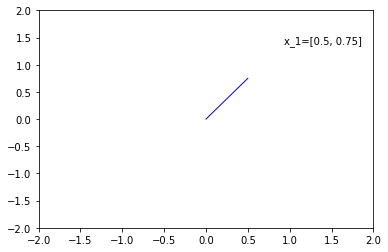

In [9]:
A, x = np.array([[0.5, -0.6],[0.75, 1.1]]), np.array([[1],[0]])
fargs = [A, x]

plt.close() # This is to close other interactive plots, or the animation will glitch!
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))

# Initiate the lines, points, and txt
line, = ax.plot([0, 1],[0,0], color = 'b', linewidth = 1)
pts, = ax.plot([],[], color = 'r', linewidth = 1)
txt = ax.text(1.4,1.4,'x_0=[1, 0]', horizontalalignment='center')
pts_x, pts_y = [], []



def update(i, *fargs):

    # Get the original A and x
    A, x = fargs
    
    # Calculate A to the power of i
    A = la.matrix_power(A, int(i+1))
    
    # Apply the transformation
    x = A.dot(x)
    
    # Record the new coordinates
    pts_x.append(x[0,0])
    pts_y.append(x[1,0])
    
    # Update the plot 
    line.set_data([0, x[0,0]],[0,x[1,0]])
    pts.set_data(pts_x, pts_y)
    string = 'x_{}=[{}, {}]'.format((i+1), x[0,0].round(2), x[1,0].round(2))
    txt.set_text(string)
    
    return [line,pts,txt]


fig.canvas.draw()
ani = anime.FuncAnimation(fig, update, fargs=fargs, interval=500)

plt.show()

### Design a Transformation with Specific Scaling and Rotation<a name="DRT"></a>
[Return to Table of Content](#Table_of_Content)

Following the instruction in the lecture notes, i.e.,
![](img/design_rotate.png)

we can conveniently design any transformation of scaling and rotation.

Let's build a transformation which can rotate a vector for $5$ degree and also scale it by a factor of $0.995$, simultaneously. 


Accordingly, we set the variables as following.

$$
a=1 \tag{1}
$$

$$
\varphi=\frac{5\pi}{180} \tag{2}
$$

$$
b=a\cdot\tan{\varphi} \tag{3}
$$

$$
r=\sqrt{a^2+b^2} \tag{4}
$$

$$
A = r'\begin{pmatrix}a/r&-b/r\\b/r&a/r\end{pmatrix} \tag{5}
$$
where $r'=0.995$ produce the collapse. (If we use $r$ instead of $r'$, then the rotation will produce a standard circle, not a spiral.)

+ Eq. (1) can be set to any scalar. The value does not matter.
+ Eq. (2) is the angle represented by radian.
+ Eq. (3) forces that $\tan{\varphi}=\frac{b}{a}$.
+ Eq. (4) is the magnitude of the complex eigenvalue $\lambda=a\pm bi$.
+ Eq. (5) uses $r'<1$ to produce the collapse.

Since $\varphi=5\frac{\pi}{180}$, we will have $T=\frac{2\pi}{\varphi}=\frac{360\pi}{5\pi}=72$ repetitions for one cycle. We can imagine that for every 72 repetitions we get a shrinked $x$ back! And finally, the trajectory collapses to the centroid, being as a spiral.

1.0038198375433474


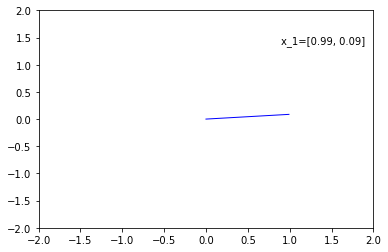

In [10]:
plt.close() # This is to close other interactive plots, or the animation will glitch!

fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([0, 1],[0,0], color = 'b', linewidth = 1)
pts, = ax.plot([],[],color = 'r', linewidth = 1)
txt = ax.text(1.4,1.4,'x_0=[1, 0]', horizontalalignment='center')
pts_x, pts_y = [], []

a = 1
phi = 5*pi/180
b = a * np.tan(phi)
r = np.sqrt(a*a + b*b)
A = 0.995 * np.array([[a/r, -b/r],
                     [b/r, a/r]])
x = np.array([[1],[0]])

fargs = [A, x]
def update(i, *fargs):
    
    # Get the original A and x
    A, x = fargs
    
    ##### Calculate the new x_i ###########################
    A = la.matrix_power(A, int(i+1))
    x = A.dot(x)
    #######################################################
    
    ##### Append the new x_i to draw the trajectory #######
    pts_x.append(x[0,0])
    pts_y.append(x[1,0])
    #######################################################
    
    ##### Update the plot #################################
    line.set_data([0, x[0,0]],[0,x[1,0]])
    pts.set_data(pts_x, pts_y)
    string = 'x_{}=[{}, {}]'.format((i+1)%72, x[0,0].round(2), x[1,0].round(2))
    txt.set_text(string)
    #######################################################
    
    return [line,pts, txt]


fig.canvas.draw()
ani = anime.FuncAnimation(fig, update, fargs=fargs, interval=100)

plt.show()

### Takeaways<a name="Takeaways"></a>
[Return to Table of Content](#Table_of_Content)

1. Do read this [nice explanation](https://math.stackexchange.com/questions/1546104/complex-eigenvalues-of-a-rotation-matrix) explaining how to understand the meaning of complex eigenvalues of a rotation matrix.
2. And also [this extraordinary page](http://twistedoakstudios.com/blog/Post7254_visualizing-the-eigenvectors-of-a-rotation) annimating the effect of different eigenvalues on the transformation.

### Practice<a name="Practice"></a>
[Return to Table of Content](#Table_of_Content)

1. Define a routine `C = build_rotate(a, b, phi, r, scale)` following Eq. 1-5 by encapsulating relevant code from this demo, where `C` is the designed matrix for producing rotation (counterclockwise `phi` degree) and scaling (`scale` times).